# Data Challenge for Insight Health Data Science

### Conversion rate problem

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set()

# Exploration

In [68]:
conversion_df = pd.read_csv('conversion_data.csv')

In [69]:
conversion_df.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [70]:
conversion_df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [71]:
print conversion_df.country.unique()
print conversion_df.source.unique()

['UK' 'US' 'China' 'Germany']
['Ads' 'Seo' 'Direct']


There are 4 unique countries, and 3 unique sources

In [72]:
conversion_df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [73]:
conversion_df.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

### Age

In [74]:
np.sort( conversion_df.age.unique() )[::-1]

array([123, 111,  79,  77,  73,  72,  70,  69,  68,  67,  66,  65,  64,
        63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,
        50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,
        37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,
        24,  23,  22,  21,  20,  19,  18,  17])

In [75]:
indsTemp= conversion_df.age > 90
conversion_df[indsTemp]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


Let's eliminate the customers with more than 90 years

In [76]:
conversion_df= conversion_df[np.logical_not(indsTemp)]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda44b09f90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fda446376d0>], dtype=object)

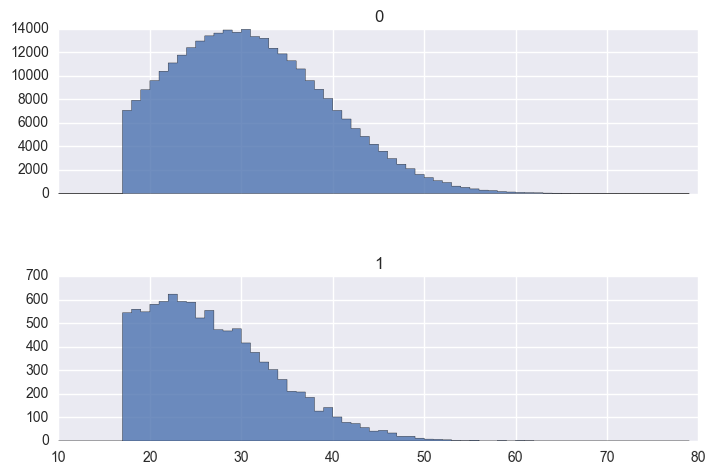

In [77]:
conversion_df.hist('age', by='converted', sharex=True, sharey=False, bins=np.arange(10,80,1),
                   histtype='stepfilled', alpha=0.8, layout=(2,1), rot=True)

Seems like younger customers are more likely to convert

In [12]:
print stats.ttest_ind(conversion_df.age[conversion_df.converted==1], conversion_df.age[conversion_df.converted==0], equal_var=False)
print stats.mannwhitneyu(conversion_df.age[conversion_df.converted==1], conversion_df.age[conversion_df.converted==0])

Ttest_indResult(statistic=-59.381955055763733, pvalue=0.0)
MannwhitneyuResult(statistic=1092381076.0, pvalue=0.0)


Both a Welch's t-test and a Mann-Whitney reveal a statistical difference between the ages, depending on the conversion rate

### New user

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda4b1988d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fda4ac54d50>], dtype=object)

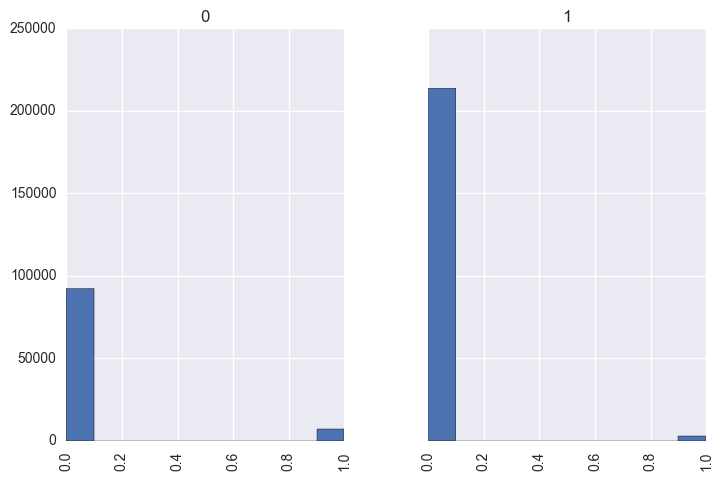

In [17]:
conversion_df.hist(column='converted', by='new_user', sharey=True)

In [33]:
def stderr(values):
    return np.std(values, ddof=1)/np.sqrt(len(values))

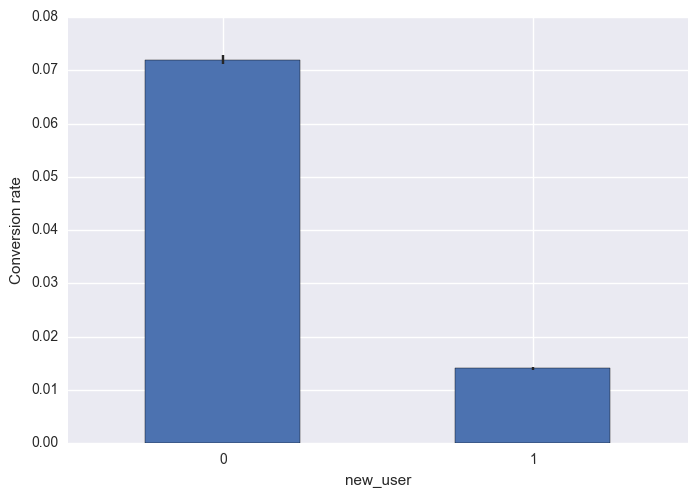

In [37]:
conversion_df.groupby('new_user').converted.mean().plot(kind='bar',rot=True,yerr=conversion_df.groupby('new_user').converted.apply(stderr))
plt.ylabel('Conversion rate')

In [48]:
print stats.ttest_ind(conversion_df.new_user[conversion_df.converted==1], conversion_df.new_user[conversion_df.converted==0], equal_var=False)
print stats.mannwhitneyu(conversion_df.new_user[conversion_df.converted==1], conversion_df.new_user[conversion_df.converted==0])

Ttest_indResult(statistic=-86.94975660356522, pvalue=0.0)
MannwhitneyuResult(statistic=935579205.0, pvalue=0.0)


Clearly, new users are far less likely to be converted`

### Total pages visited

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda462812d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fda45fe0410>], dtype=object)

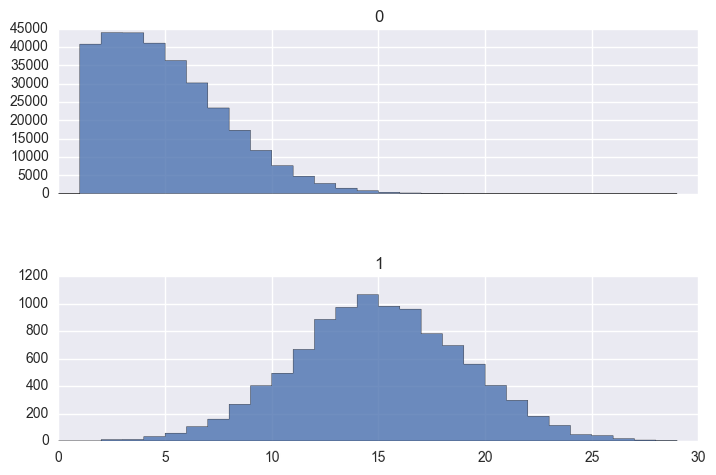

In [41]:
conversion_df.hist('total_pages_visited', by='converted', sharex=True, sharey=False, bins=np.arange(0,30,1),
                   histtype='stepfilled', alpha=0.8, layout=(2,1), rot=True)

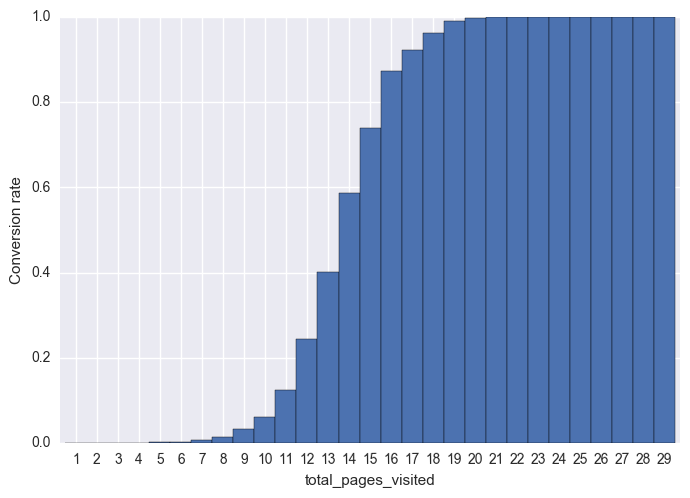

In [46]:
conversion_df.groupby('total_pages_visited').converted.mean().plot(kind='bar',rot=True, width=1)
plt.ylabel('Conversion rate')

Interestingly, if a customer visits more than 14 pages, he's more likely to convert

In [47]:
print stats.ttest_ind(conversion_df.total_pages_visited[conversion_df.converted==1], conversion_df.total_pages_visited[conversion_df.converted==0], equal_var=False)
print stats.mannwhitneyu(conversion_df.total_pages_visited[conversion_df.converted==1], conversion_df.total_pages_visited[conversion_df.converted==0])

Ttest_indResult(statistic=252.80078623298368, pvalue=0.0)
MannwhitneyuResult(statistic=73795661.0, pvalue=0.0)


### Country

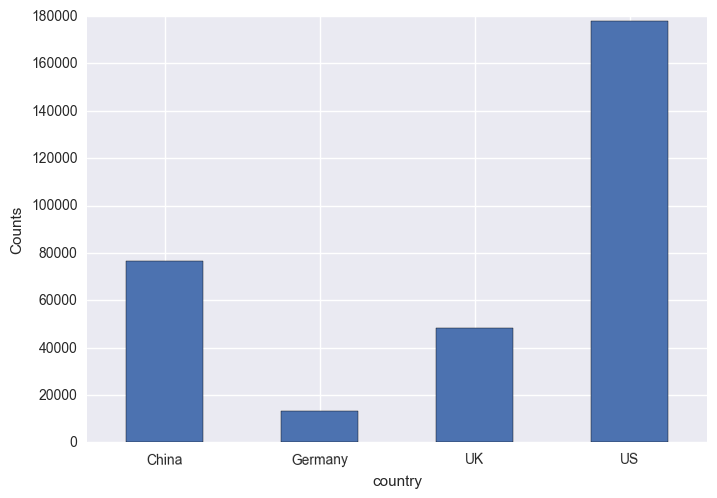

In [84]:
conversion_df.groupby('country').converted.count().plot(kind='bar',rot=True)
plt.ylabel('Counts')

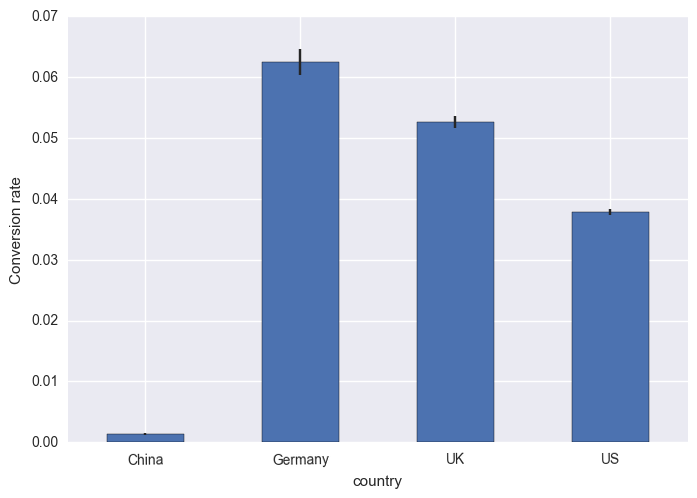

In [49]:
conversion_df.groupby('country').converted.mean().plot(kind='bar',rot=True,yerr=conversion_df.groupby('country').converted.apply(stderr))
plt.ylabel('Conversion rate')

China has a much lower conversion rate

### Source

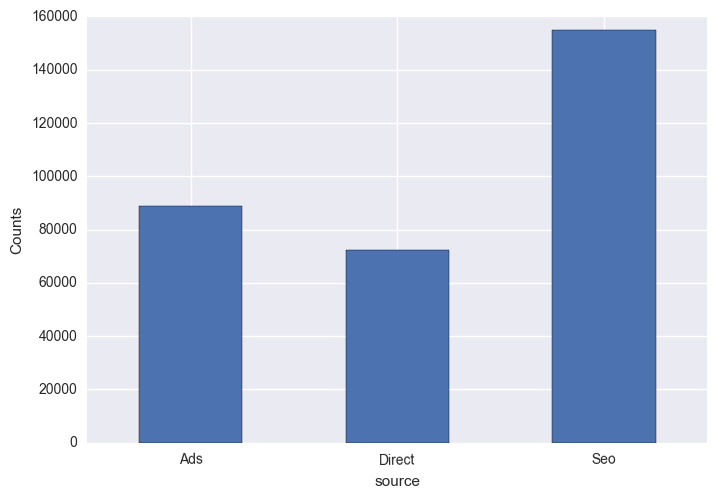

In [85]:
conversion_df.groupby('source').converted.count().plot(kind='bar',rot=True)
plt.ylabel('Counts')

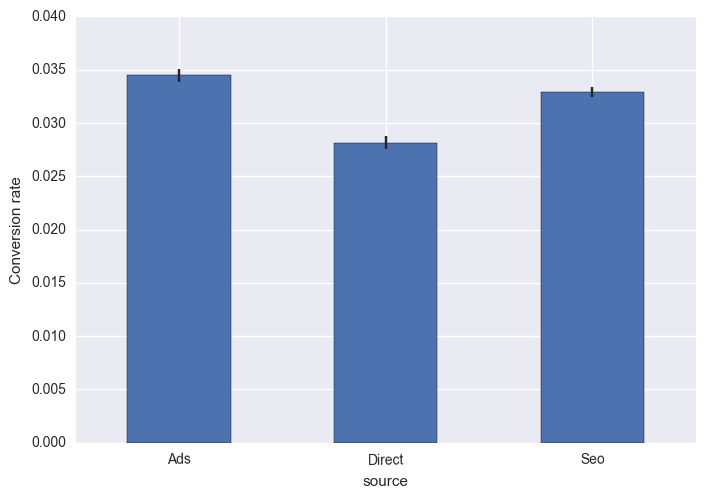

In [50]:
conversion_df.groupby('source').converted.mean().plot(kind='bar',rot=True,yerr=conversion_df.groupby('source').converted.apply(stderr))
plt.ylabel('Conversion rate')

Direct source has a lower conversion rate than other sources

# Preprocessing

In [144]:
Y= conversion_df.converted

In [90]:
X= pd.get_dummies(conversion_df.loc[:,[u'country', u'age', u'new_user', u'source', u'total_pages_visited']], columns=['country', 'source'])

In [91]:
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


All variables are now encoded as numbers

Now let's normalize them

In [92]:
from sklearn.preprocessing import StandardScaler

In [131]:
scalerAge = StandardScaler().fit(X.age)

/home/joao/anaconda2/envs/insight/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [129]:
X['age_scaled']= scalerAge.transform(X.age)

/home/joao/anaconda2/envs/insight/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [132]:
scalerPages = StandardScaler().fit(X.total_pages_visited)

/home/joao/anaconda2/envs/insight/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [133]:
X['pages_scaled']= scalerPages.transform(X.total_pages_visited)

/home/joao/anaconda2/envs/insight/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [134]:
X_scaled= X.loc[:,[u'new_user',
                   u'country_China', u'country_Germany', u'country_UK', u'country_US',
                   u'source_Ads', u'source_Direct', u'source_Seo',
                   u'age_scaled', u'pages_scaled']]

In [137]:
# Confirm std is close to 1
X_scaled.std()

new_user           0.464329
country_China      0.428451
country_Germany    0.198955
country_UK         0.360203
country_US         0.495987
source_Ads         0.449314
source_Direct      0.420212
source_Seo         0.499907
age_scaled         1.000002
pages_scaled       1.000002
dtype: float64

In [153]:
# pd.concat([X_scaled,Y], axis=1).to_csv('scaled_conversion.csv', index=False, header=True)

# Predict conversion rate

In [157]:
Y.value_counts()/Y.count()

0    0.967748
1    0.032252
Name: converted, dtype: float64

On average, only 3.2252% of the users convert

In other words, by choosing 'did not convert' as default, one would get an accuracy of 96.7748%

#### Shuffle cross-validation

In [222]:
from sklearn import linear_model
from sklearn import model_selection

In [230]:
model= linear_model.LogisticRegression()

In [231]:
cv = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, random_state=2)
scores_logistic = model_selection.cross_val_score(model, X_scaled, Y, cv=cv)

In [232]:
print scores_logistic.mean(), scores_logistic.std()

0.986282943285 0.000305633700196


We get an accuracy of 98.6283%

#### Let's separate into training and testing sets

In [237]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_scaled, Y, test_size=0.3, random_state=2)

In [239]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [240]:
# predict class labels for the test set
predicted = model.predict(X_test)
print predicted

[0 0 0 ..., 0 0 0]


In [242]:
# generate class probabilities
probs= model.predict_proba(X_test)
print probs

[[  9.99650826e-01   3.49174199e-04]
 [  9.98310320e-01   1.68968038e-03]
 [  9.97653073e-01   2.34692740e-03]
 ..., 
 [  9.99977868e-01   2.21322147e-05]
 [  9.99751156e-01   2.48843924e-04]
 [  9.98994485e-01   1.00551476e-03]]


In [243]:
from sklearn import metrics

In [245]:
# generate evaluation metrics
print metrics.accuracy_score(Y_test, predicted)

0.986928104575


The accuracy is 98.6928%

In [246]:
print metrics.roc_auc_score(Y_test, probs[:, 1])

0.987127774574


The AUC score of the ROC curve is 0.987128

In [256]:
# Confusion matrix
print metrics.confusion_matrix(Y_test, predicted)

[[91492   318]
 [  922  2128]]


In [250]:
print metrics.classification_report(Y_test, predicted)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     91810
          1       0.87      0.70      0.77      3050

avg / total       0.99      0.99      0.99     94860



In [264]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, probs[:,1])

In [275]:
auc= metrics.auc(fpr,tpr)
# auc= metrics.roc_auc_score(Y_test, probs[:, 1])

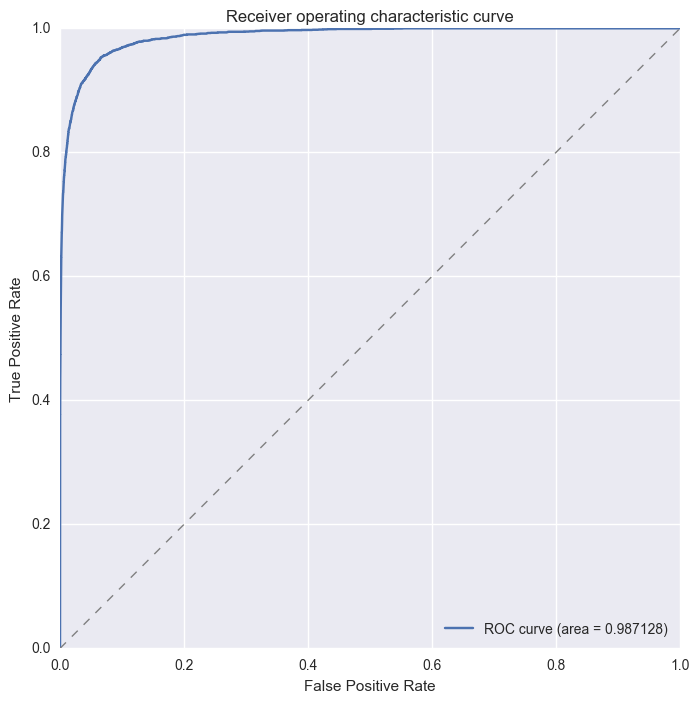

In [289]:
plt.figure(figsize=(8,8))
ax=plt.subplot(111,aspect='equal')
plt.plot(fpr,tpr, label='ROC curve (area = %0.6f)' % auc)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc='lower right')

#### Coefficients

In [254]:
coeff_df= pd.DataFrame( zip(X_scaled.columns,model.coef_.squeeze().T), columns=['feature','coefficient'] )

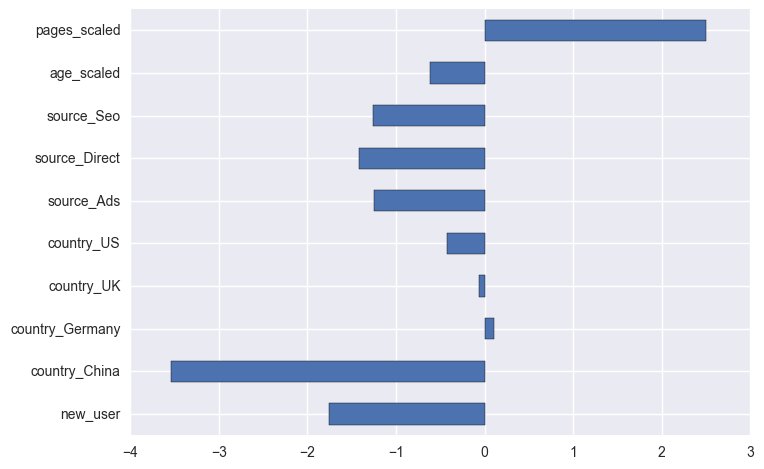

In [255]:
coeff_df.coefficient.plot(kind='barh')
yt, ytl= plt.yticks();
plt.yticks(yt,coeff_df.feature.tolist());

We see that being from China, or being a new user, diminishes substantially the chances of conversion

On the other hand, the more pages a user visits, the more likely he  is to convert